In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True) 

In [ ]:
wine_review = pd.read_csv('/content/drive/MyDrive/StudyData/wine_data.csv')

In [ ]:
wine_review.head(5)

Question 


1.   Is higher price lead to higher score? - no, autralia wine with 100 points is much cheper that france 3300 usd that also 100 points
2.   Is description word, price effect point score ? - description length isn't effect much on price or point
3.   Can description and price predict point ? 



Step 1. Clean Data

In [ ]:
wine_review.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [ ]:
# Drop unuse Columns
wine_review = wine_review.drop(columns=['Unnamed: 0'])

In [ ]:
# See missing value
wine_review.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
# Clean na

# Drop all rows that isn't contain price due to the wine price is so vary can't be replace with mean
# 1. Price, point can't be replace with mean because the price is so vary
# 2. Drop all na country and variety because it can't replacible 
wine_review_clean = wine_review.dropna(subset=['price','points','country','variety'])
wine_review_clean.isnull().sum()

In [ ]:
# Clean description text
wine_review_clean["designation"].fillna("No Designation", inplace = True)
wine_review_clean["region_1"].fillna("No Information", inplace = True)
wine_review_clean["region_2"].fillna("No Information", inplace = True)
wine_review_clean["taster_name"].fillna("No Tester", inplace = True)
wine_review_clean["taster_twitter_handle"].fillna("No Tweeter", inplace = True)
wine_review_clean.isnull().sum()

In [ ]:
wine_review_clean.describe()

We want to add description lenght to see it relation to point and price 

In [ ]:
wine_review_clean['description_lenght'] = wine_review_clean['description'].str.len()
wine_review_clean

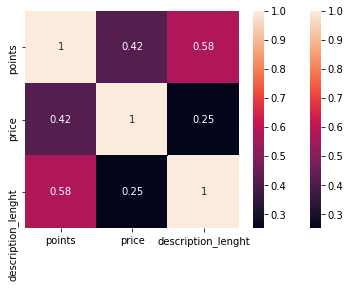

In [ ]:
heat = wine_review_clean.corr()
sns.heatmap(heat)
sns.heatmap(heat, annot = True)
plt.show()

So they are some corelation between point price description_length

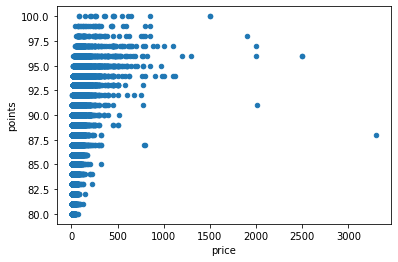

In [ ]:
wine_review_clean.plot.scatter(x='price', y='points')
plt.show()

Some high price wine isn't mean they will get higher point

In [ ]:
wine_review_clean['country'].value_counts().head(10)

US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


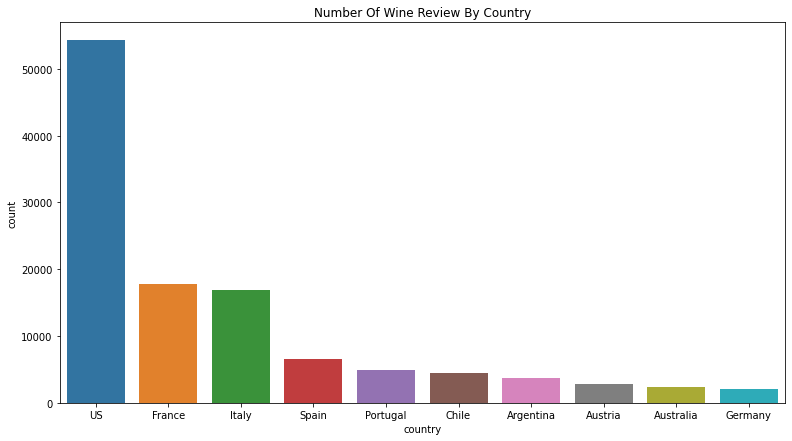

In [ ]:
plt.subplots(figsize=(13,7))
sns.countplot('country',data=wine_review_clean,order=wine_review_clean['country'].value_counts().head(10).index)
plt.title('Number Of Wine Review By Country')
plt.show()

Pinot Noir is very popular among reviewer 

In [ ]:
grouping_cp = wine_review_clean.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:10]
grouping_cp

,price
country,
France,3300.0
US,2013.0
Austria,1100.0
Portugal,1000.0
Italy,900.0
Australia,850.0
Germany,775.0
Spain,770.0
Hungary,764.0


Text(0.5, 0, '')

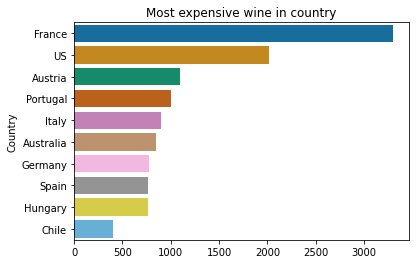

In [ ]:
expensive_plot = sns.barplot(x = grouping_cp['price'], y = grouping_cp.index, palette= 'colorblind')
expensive_plot.set_title('Most expensive wine in country')
expensive_plot.set_ylabel('Country')
expensive_plot.set_xlabel('')

French wine is so expensive 

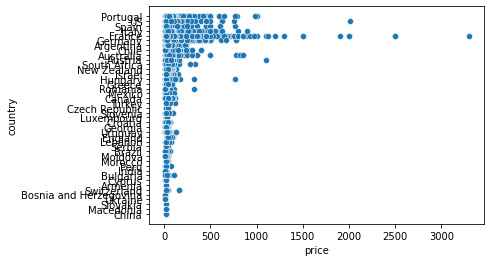

In [ ]:
sns.scatterplot(data=wine_review_clean, x='price', y="country")

Let's see points stat

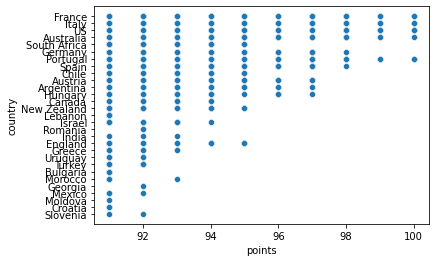

In [ ]:
sns.scatterplot(data=wine_review_clean[wine_review_clean['points'] > 90], x='points', y="country")

In [ ]:
 aa = wine_review.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:10]
 aa

,points
country,
Italy,100
US,100
Australia,100
France,100
Portugal,100
Spain,98
Germany,98
Argentina,97
Austria,97


In [ ]:
 bb = wine_review[wine_review['points'] > 99].groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:10]
 bb

,price
country,
France,1500.0
Portugal,650.0
Italy,550.0
US,450.0
Australia,350.0


**Australia wine price is much cheaper than France with highest score so it can be conclude that expensive wine isn't always higher points**

Text(0.5, 0, '')

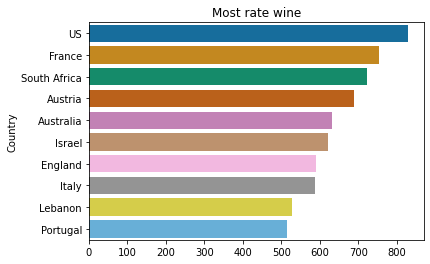

In [ ]:
sort_value_wine = wine_review_clean.groupby(['country'])['description_lenght'].max().sort_values(ascending=False).to_frame()[:10]
rate_wine_plot = sns.barplot(x = sort_value_wine['description_lenght'], y = sort_value_wine.index, palette= 'colorblind')
rate_wine_plot.set_title('Most descriptive wine')
rate_wine_plot.set_ylabel('Country')
rate_wine_plot.set_xlabel('')

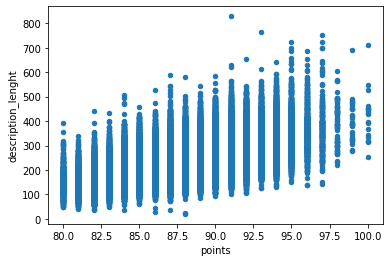

In [ ]:
wine_review_clean.plot.scatter(x='points', y='description_lenght')
plt.show()

We can see that with 100 score can be less description length

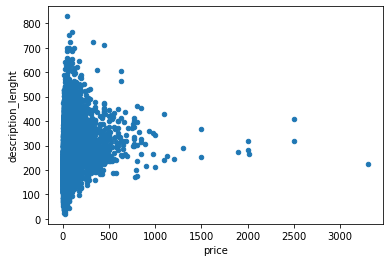

In [ ]:
wine_review_clean.plot.scatter(x='price', y='description_lenght')
plt.show()

Alot of description also not lead to higher price

So we can conclude that description length isn't effect much on price or point 

Let's try Data pipeline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
def load_data():
    raw_data = wine_review_clean[['points','price','description_lenght']]
    return raw_data

In [ ]:
def extract_feature(df):
    label = np.log(df['points'])
    data = df.drop('points', axis=1)
    return data, label

In [ ]:
def split_train_test(df):
    train_df, test_df = train_test_split(df, test_size=0.3, random_state=2020, shuffle=True)
    return train_df, test_df

In [ ]:
def train_model(feat, label):

    # Gradient Boosting
    # model = GradientBoostingRegressor(random_state=2020)

    # Decision Tree
    # model = tree.DecisionTreeRegressor(max_depth=20, random_state=200)

    # Linear Regression
    model = LinearRegression()
    model.fit(feat, label)

    return model

In [ ]:
def rmse(predict, test_label):
    diff = predict - test_label
    return np.sqrt(sum(diff ** 2) / len(diff))

In [ ]:
def run_pipeline():
    # Get data
    raw_data_df = load_data()
    # Clean
    # clean_data_df = clean_data(raw_data_df)

    # Separate Train, Test
    train_df, test_df = split_train_test(raw_data_df)

    # Extract feature
    train_feat, train_label = extract_feature(train_df)
    test_feat, test_label = extract_feature(test_df)

    # Train Model
    model = train_model(train_feat, train_label)

    # Predict Test
    predict = model.predict(test_feat)
    #accuracy = eval_acc(predict, test_label)

    error = rmse(predict, test_label)

    # error_evl = eval_r2(predict, test_label)

    # GradientBoostingRegressor : 19271650.040928077
    # RandomForestRegressor : 8787802.622595124
    # Linear Regression: 26824990.764228985
    # return  train_df.boxplot()
    print(error)
    return model

In [ ]:
use_model = run_pipeline()

0.026614897119800328


In [ ]:
description_lenght = 500
price = 300

input_df = pd.DataFrame({"price":[price], "description_lenght":[description_lenght]})
input_df
predict_data = use_model.predict(input_df)

predict_data[0]

4.6122325460765605

only price and description lenght can't use to predict accurate point so we need to imporve feature to gain more accuracy 